### Initial imports

In [ ]:
from pathlib import Path
import pandas as pd


In [2]:
import os

current_path = os.getcwd()


new_path = os.path.abspath(os.path.join(current_path, '..', 'src'))

os.chdir(new_path)

print(f"Eredeti hely: {current_path}")
print(f"Új munkakönyvtár: {os.getcwd()}")

from data_processing_01 import prepare_df_from_folder
from config import RAW_DATA_FOLDER_PATH

Eredeti hely: c:\Users\hp_user\OneDrive - Budapesti Műszaki és Gazdaságtudományi Egyetem\Dokumentumok\GitHub\Legal-text-decoder\notebook
Új munkakönyvtár: c:\Users\hp_user\OneDrive - Budapesti Műszaki és Gazdaságtudományi Egyetem\Dokumentumok\GitHub\Legal-text-decoder\src


c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exploring Dataset

In [3]:

path = Path(f"../{RAW_DATA_FOLDER_PATH}")
print(f"Loading from: {path}")


Loading from: ..\data\all_data


In [4]:
df = prepare_df_from_folder(path)

Processing: ..\data\all_data\alza_aszf.json
Processing: ..\data\all_data\budapestgo_aszf.json
Processing: ..\data\all_data\cimekezes.json
Processing: ..\data\all_data\cimkezes (1).json
Processing: ..\data\all_data\cimkezes.json
Processing: ..\data\all_data\dpd.json
Processing: ..\data\all_data\epitesi_beruhazas.json
Processing: ..\data\all_data\erste-diakhitel-kozpont_cimkezes.json
Processing: ..\data\all_data\FA0B9B_labeling.json
Processing: ..\data\all_data\hardverapro_labeled.json
Processing: ..\data\all_data\legal_text_dataset.json


In [5]:
df.head()

,text,label
0,1. Az Alza.hu Kft. (cégjegyzékszám: 01-09-2868...,3-Többé/kevésbé megértem
1,2. Jelen Fogyasztói ÁSZF csak a fogyasztónak m...,2-Nehezen érthető
2,3. A jelen Fogyasztói ÁSZF tartalmának elfogad...,4-Érthető
3,4. A jelen Fogyasztói ÁSZF-nek a Webáruház has...,4-Érthető
4,5. A Fogyasztó a Webáruházban és a fizikai üzl...,5-Könnyen érthető


In [6]:
df['label'].value_counts()

label
5-Könnyen érthető           494
4-Érthető                   430
3-Többé/kevésbé megértem    306
2-Nehezen érthető           155
1-Nagyon nehezen érthető     63
Name: count, dtype: int64

In [10]:
df['text'].str.len().mean()

359.46132596685084

In [11]:
df['text'].str.split().str.len().mean()

44.91091160220994

In [12]:
df['text'].str.split().str.len().min()

1

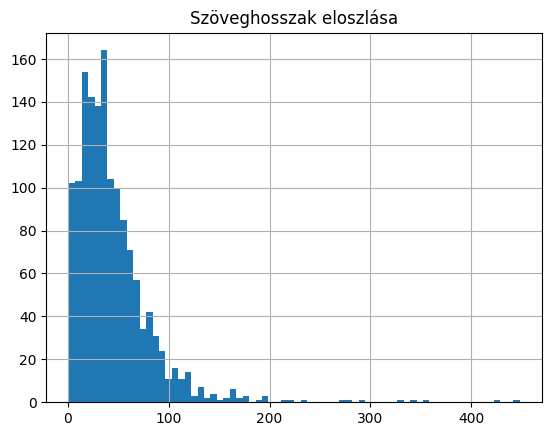

In [17]:
import matplotlib.pyplot as plt
df['text'].str.split().str.len().hist(bins=70)
plt.title("Szöveghosszak eloszlása")
plt.show()

In [19]:
df['word_count'] = df['text'].str.split().str.len()

short_texts = df[df['word_count'] < 7]

print(f"Összes sor: {len(df)}")
print(f"Rövid sorok (<7 szó): {len(short_texts)}")

Összes sor: 1448
Rövid sorok (<7 szó): 88
